In [31]:
use_percent = True
use_avg = True

########################### 2023-01-20 ###########################
data_dir = "/home/derposoft/Documents/tb_logs/tb_logs_flairs"
data_lines_baseline_v_gcn_2hp = {
    "baseline_2hp_NOOPT_SEED": "#000000",
    "hybridGCN_2hp_localemb_NOOPT_SEED": "#808080",
}
data_lines_baseline_v_gcn_5hp = {
    "baseline_5hp_NOOPT_SEED": "#000000",
    "hybridGCN_5hp_localemb_NOOPT_SEED": "#808080",
}
data_lines_baseline_v_gcn_20hp = {
    "baseline_20hp_NOOPT_SEED": "#000000",
    "hybridGCN_20hp_localemb_NOOPT_SEED": "#808080",
}

experiments = data_lines_baseline_v_gcn_5hp

In [32]:
import pandas as pd
import numpy as np
import os
ospj = os.path.join
osl = os.listdir

time_column = "num_agent_steps_trained"
data_column = "evaluation/episode_reward_mean"
_labels = {
    "baseline_2hp_NOOPT_SEED": "Baseline@2HP",
    "hybridGCN_2hp_localemb_NOOPT_SEED": "GCN@2HP",

    "baseline_5hp_NOOPT_SEED": "Baseline@5HP",
    "hybridGCN_5hp_localemb_NOOPT_SEED": "GCN@5HP",
    
    "baseline_20hp_NOOPT_SEED": "Baseline@20HP",
    "hybridGCN_20hp_localemb_NOOPT_SEED": "GCN@20HP",
}
labels = [
    _labels[path] for path in experiments
]
experiment_folders = {
    experiment_filter: [x for x in osl(data_dir) if experiment_filter in x]
    for experiment_filter in experiments 
}
data = {
    experiment_filter: [
        pd.read_csv(ospj(ospj(data_dir, run_path), "progress.csv"))
        for run_path in experiment_folders[experiment_filter]
    ]
    for experiment_filter in experiment_folders
}
"""
point_at_40k = [
    d[data_column][d.shape[0]-1] for d in data
]
print(dict(zip(labels, point_at_40k)))
for i in range(len(labels)):
    if "baseline" in labels[i]:
        results = []
        for label, point in zip(labels, point_at_40k):
            if "baseline" not in label:
                results.append(f"{label} is {100*(point-point_at_40k[i])/point_at_40k[i]:.4}% ahead of baseline")
        for result in results:
            print(result)
        break
"""
print()

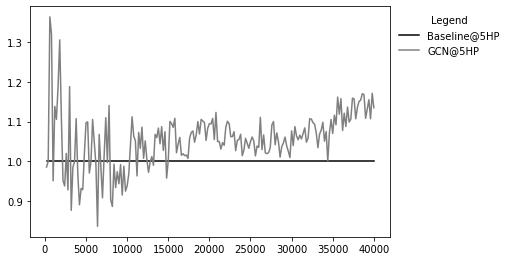

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
import numpy as np

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['lines.marker']  #None
mpl.rcParams['lines.markersize']  #6.0
mpl.rcParams['lines.linewidth']   # 1.5
mpl.rcParams['axes.prop_cycle']

mpl.colors.to_rgb('#1f77b4')

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.8])

def get_avg_line(data, experiment_filter):
    return np.average(
        [run[data_column].values for run in data[experiment_filter]],
        axis=0,
    )


lines = []
handles = []
for experiment_filter in data:
    baseline_data = get_avg_line(data, list(experiments.keys())[0])
    if use_avg:
        run = data[experiment_filter][0]
        avg_data_line = get_avg_line(data, experiment_filter)
        if use_percent:
            avg_data_line /= baseline_data
        lines.append(
            ax.plot(
                run[[x for x in run.columns if "timestep" in x][0]].values,
                avg_data_line,
                marker='',
                color=experiments[experiment_filter]
            )
        )
    else:
        for run in data[experiment_filter]:
            data_line = run[[x for x in run.columns if "timestep" in x][0]].values
            #if use_percent:
            #    data_line /= baseline_data
            lines.append(
                ax.plot(
                    data_line,
                    run[data_column].values,
                    marker='',
                    color=experiments[experiment_filter]
                )
            )
    handles.append(lines[-1][0])

ax.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 1),
    title='Legend',
    frameon=False,
)
#plt.ylim((0, 70))
plt.show()